In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import joblib as jb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

In [3]:
dataSet = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [4]:
dataSet.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
dataSet.shape

(5110, 12)

'next step checking if dataset is balanced or not'

In [6]:
dataSet['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

'next step checking for missing values'

In [7]:
dataSet.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

'checking how bmi is distributed to know how to replace missing values'

C:\Users\USER\AppData\Local\Temp\ipykernel_14300\381489304.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(dataSet.bmi)


<Axes: xlabel='bmi', ylabel='Density'>

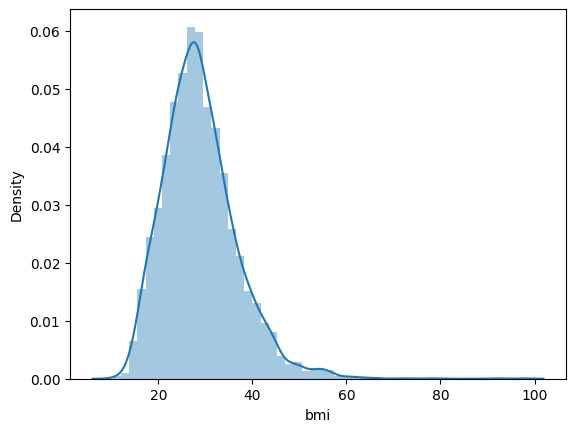

In [8]:
sb.distplot(dataSet.bmi)

In [9]:
dataSet['bmi'].fillna(dataSet.bmi.mean(), inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_14300\659989824.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataSet['bmi'].fillna(dataSet.bmi.mean(), inplace=True)


In [10]:
dataSet.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

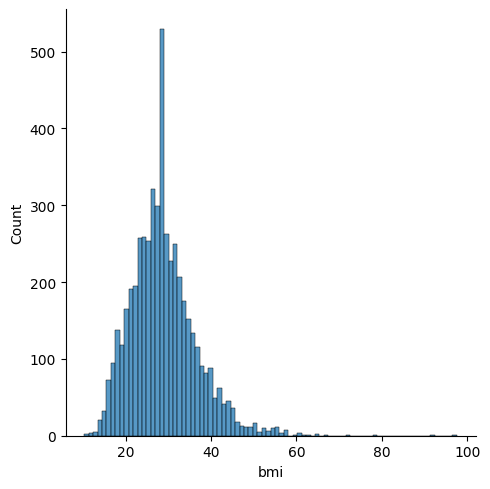

In [11]:
sb.displot(dataSet['bmi'])

no nead to standardize numeirical columns coz we are using random forest(tree based classification algorithm)

In [12]:
dataSet.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


now we have to balance the dataset.
prefered choice is to oversample the minority class.

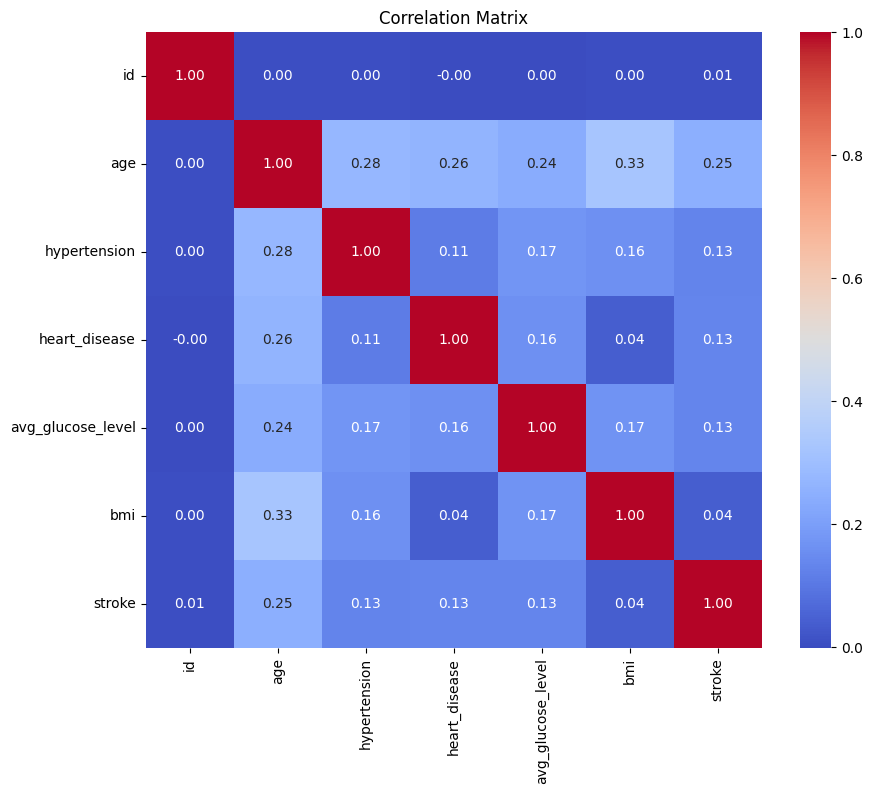

In [13]:
numeric_data = dataSet.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_data.corr()
plt.figure(figsize=(10, 8))
sb.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Matrix")
plt.show()

In [14]:
dataSet = dataSet.drop(columns=['id'])

In [15]:
dataSet.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [16]:
y = dataSet['stroke']
x = dataSet.drop(columns=['stroke'])
x_encoded = pd.get_dummies(x, drop_first=True)


In [17]:
x_train, x_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.2, random_state=42, stratify=y)

In [18]:
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [19]:
model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(x_train_resampled, y_train_resampled)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [20]:
y_pred = model.predict(x_test)

In [21]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[934  38]
 [ 41   9]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       972
           1       0.19      0.18      0.19        50

    accuracy                           0.92      1022
   macro avg       0.57      0.57      0.57      1022
weighted avg       0.92      0.92      0.92      1022



In [22]:
jb.dump(model, 'stroke_model.pkl')

['stroke_model.pkl']

In [23]:
jb.dump(x_encoded.columns.tolist(), 'columns.pkl')

['columns.pkl']